### 2.1 Carga de los datos y librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline



In [2]:
my_sheet = 'Sheet1'
file_name = 'PCA_exercise_1.xlsx' # name of your excel file
df_in = pd.read_excel(file_name, sheet_name = my_sheet)

In [3]:
df_in.head() # shows headers with top 5 rows

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5
0         NaN        NaN   Object 1   Object 2   Object 3   Object 4
1         NaN     Band 1        375        135        458        475
2         NaN     Band 2         57         47         53         73
3         NaN     Band 3        245        267        242        227
4         NaN     Band 4       1472       1494       1462       1582

In [4]:
#Cleaning the data
df_in.drop(df_in.columns[[0,1]],axis=1, inplace = True )
df_in.drop(0,inplace = True)
df_in.rename(columns={'Unnamed: 1':'Band','Unnamed: 2':'1', 'Unnamed: 3':'2', 'Unnamed: 4':'3', 'Unnamed: 5':'4'}, inplace=True)
df_in.rename(index={1: 'Band 1',2: 'Band 2',3: 'Band 3',4: 'Band 4',5: 'Band 5',6: 'Band 6',7: 'Band 7',8: 'Band 8',9: 'Band 9',
                    10: 'Band 10',11: 'Band 11',12: 'Band 12',13: 'Band 13',14: 'Band 14',15: 'Band 15',16: 'Band 16',17: 'Band 17'}, inplace=True)

In [5]:
df_in.head() # shows headers with top 5 rows

1     2     3     4
Band 1   375   135   458   475
Band 2    57    47    53    73
Band 3   245   267   242   227
Band 4  1472  1494  1462  1582
Band 5   105    66   103   103

In [6]:
df = df_in.transpose()
df.head()

Band 1 Band 2 Band 3 Band 4 Band 5 Band 6 Band 7 Band 8 Band 9 Band 10  \
1    375     57    245   1472    105     54    193    147   1102     720   
2    135     47    267   1494     66     41    209     93    674    1033   
3    458     53    242   1462    103     62    184    122    957     566   
4    475     73    227   1582    103     64    235    160   1137     874   

  Band 11 Band 12 Band 13 Band 14 Band 15 Band 16 Band 17  
1     253     685     488     198     360    1374     156  
2     143     586     355     187     334    1506     139  
3     171     750     418     220     337    1572     147  
4     265     803     570     203     365    1256     175

In [7]:
# Se divide la matriz del dataset 
X = df.iloc[:,0:17].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas


In [8]:
print(X)

[[375 57 245 1472 105 54 193 147 1102 720 253 685 488 198 360 1374 156]
 [135 47 267 1494 66 41 209 93 674 1033 143 586 355 187 334 1506 139]
 [458 53 242 1462 103 62 184 122 957 566 171 750 418 220 337 1572 147]
 [475 73 227 1582 103 64 235 160 1137 874 265 803 570 203 365 1256 175]]


### 2.2 Normalización

In [9]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [10]:
X_std.shape

(4, 17)

In [11]:
#Let's check whether the normalized data has a mean of zero and a standard deviation of one.
np.mean(X_std),np.std(X_std)

(-3.2653618371328133e-18, 1.0)

### 2.2.2 PCA analisis


In [12]:
from sklearn.decomposition import PCA

pca_stars = PCA(n_components =2)
principalComponents_stars = pca_stars.fit_transform(X_std)

In [13]:
principal_stars_Df = pd.DataFrame(data = principalComponents_stars
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
principal_stars_Df.head()

principal component 1  principal component 2
0              -0.954490               0.328318
1               4.987462              -1.826611
2               0.487978               3.233672
3              -4.520951              -1.735380

In [15]:
print('Explained variation per principal component: {}'.format(pca_stars.explained_variance_ratio_))

Explained variation per principal component: [0.68327871 0.24871288]


In [16]:
principal_stars_Df.rename(index={0:'Object 1',1:'Object 2', 2:'Object 3', 3:'Object 4'}, inplace=True)

In [17]:
principal_stars_Df.head()

principal component 1  principal component 2
Object 1              -0.954490               0.328318
Object 2               4.987462              -1.826611
Object 3               0.487978               3.233672
Object 4              -4.520951              -1.735380

#### plot visualization

In [18]:
objects = ['Object 1', 'Object 2' ,'Object 3', 'Object 4']

<Figure size 432x288 with 0 Axes>

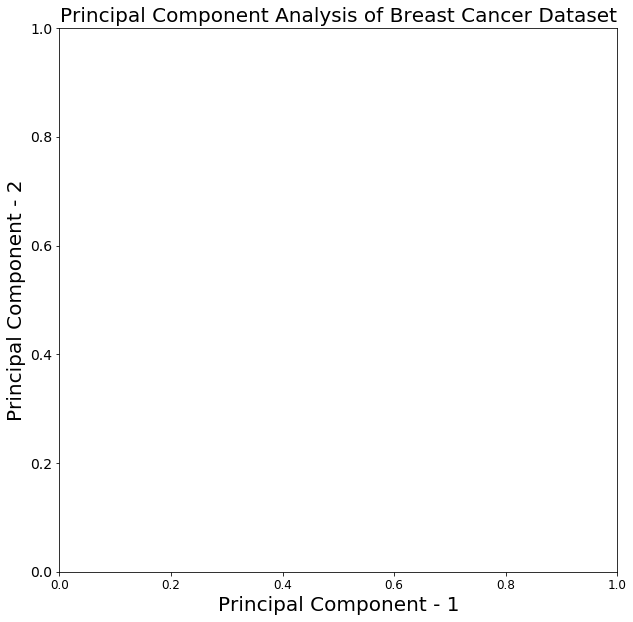

In [33]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Object 1', 'Object 2', 'Object 3' ,'Object 4']
colors = ['r', 'g','m','b']

In [31]:
objects

['Object 1', 'Object 2', 'Object 3', 'Object 4']

In [30]:
target

'Object 2'

In [37]:
lista = []
for target, color in zip(targets,colors):
    indicesToKeep = objects == target
    
    lista.append(indicesToKeep)
    #principal_stars_Df.loc[indicesToKeep, 'principal component 1']
print(lista)

[False, False, False, False]


In [20]:
for target, color in zip(targets,colors):
    indicesToKeep = objects == target
    plt.scatter(principal_stars_Df.loc[indicesToKeep, 'principal component 1']
               , principal_stars_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

KeyError: False

### 2.3 Cálculo de autovectores y autovalores (eigenvector/eigenvalue)

In [ ]:
# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

In [ ]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

#eig_vals, eig_vecs = np.linalg.eig(cov_mat)
from scipy.linalg import svd
U, s, VT = svd(cov_mat)

print('U \n%s' %U)
print('s \n%s' %s)
print('VT \n%s' %VT)



#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_std)

In [ ]:
print(pca.components_)

In [ ]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

### 2.4 Seleccionamos los los autovectores correspondientes a las componentes principales

In [ ]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

### 2.5  Proyectamos los datos sobre un espacio de dimensionalidad menor.

In [ ]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

In [ ]:
df.insert(17, "Objects", ["Object 1","Object 2","Object 3","Object 4"]) 

In [ ]:
df.head()

In [ ]:
y = df.iloc[:,17].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Object 1', 'Object 2', 'Object 3','Object 4'),
                        ('magenta', 'cyan', 'limegreen','blue')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()